## HW4, Ghazaleh Zehtab
# Q1

In [585]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plot_utils
import seaborn as sns
import statistics
from sklearn import tree, metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

### 1.a

In [586]:
df= pd.read_csv('Vehicle.csv')
df.head(20)

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


### 1.b

In [587]:
df=df.replace('MISS',np.nan)
df=df.replace('missing',np.nan)
df=df.replace('NULL',np.nan)
df=df.replace("''",np.nan)
df=df.replace("?",np.nan)
df.isna().sum()

COMPACTNESS                  0
CIRCULARITY                  0
DISTANCE_CIRCULARITY         0
RADIUS_RATIO                 0
PR.AXIS_ASPECT_RATIO         0
MAX.LENGTH_ASPECT_RATIO      0
SCATTER_RATIO                0
ELONGATEDNESS                0
PR.AXIS_RECTANGULARITY       0
MAX.LENGTH_RECTANGULARITY    0
SCALED_VARIANCE_MAJOR        0
SCALED_VARIANCE_MINOR        0
SCALED_RADIUS_OF_GYRATION    0
SKEWNESS_ABOUT_MAJOR         0
SKEWNESS_ABOUT_MINOR         0
KURTOSIS_ABOUT_MAJOR         0
KURTOSIS_ABOUT_MINOR         0
HOLLOWS_RATIO                0
Class                        0
dtype: int64

array([[<AxesSubplot:title={'center':'COMPACTNESS'}>,
        <AxesSubplot:title={'center':'CIRCULARITY'}>,
        <AxesSubplot:title={'center':'DISTANCE_CIRCULARITY'}>,
        <AxesSubplot:title={'center':'RADIUS_RATIO'}>],
       [<AxesSubplot:title={'center':'PR.AXIS_ASPECT_RATIO'}>,
        <AxesSubplot:title={'center':'MAX.LENGTH_ASPECT_RATIO'}>,
        <AxesSubplot:title={'center':'SCATTER_RATIO'}>,
        <AxesSubplot:title={'center':'ELONGATEDNESS'}>],
       [<AxesSubplot:title={'center':'PR.AXIS_RECTANGULARITY'}>,
        <AxesSubplot:title={'center':'MAX.LENGTH_RECTANGULARITY'}>,
        <AxesSubplot:title={'center':'SCALED_VARIANCE_MAJOR'}>,
        <AxesSubplot:title={'center':'SCALED_VARIANCE_MINOR'}>],
       [<AxesSubplot:title={'center':'SCALED_RADIUS_OF_GYRATION'}>,
        <AxesSubplot:title={'center':'SKEWNESS_ABOUT_MAJOR'}>,
        <AxesSubplot:title={'center':'SKEWNESS_ABOUT_MINOR'}>,
        <AxesSubplot:title={'center':'KURTOSIS_ABOUT_MAJOR'}>],
       [<Ax

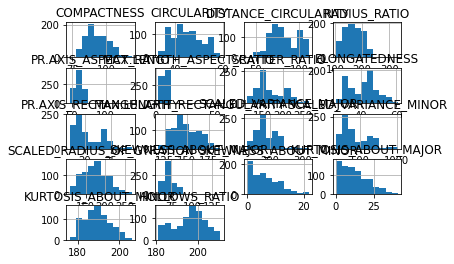

In [588]:
df.hist()

<AxesSubplot:>

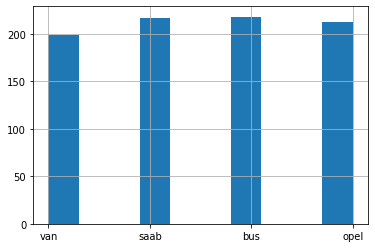

In [589]:
df['Class'].hist()

In [590]:
number = preprocessing.LabelEncoder()
df['Class']=number.fit_transform(df['Class'])
normalized = preprocessing.normalize(df)
normalized_df = pd.DataFrame(normalized ,index=df.index, columns=df.columns)
normalized_df.head(20)

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,0.150903,0.076246,0.131841,0.282744,0.114368,0.015884,0.257329,0.066715,0.031769,0.252563,0.279567,0.602022,0.292275,0.111191,0.009531,0.025415,0.297040,0.312924,0.004765
1,0.158694,0.071500,0.146487,0.245889,0.099402,0.015695,0.259840,0.078475,0.033134,0.249377,0.296462,0.575485,0.275535,0.125560,0.015695,0.024415,0.329596,0.347035,0.005232
2,0.122329,0.058812,0.124682,0.245835,0.077632,0.011762,0.243482,0.037640,0.027054,0.185846,0.262302,0.746915,0.258774,0.085866,0.016467,0.010586,0.221134,0.230544,0.002352
3,0.166013,0.073189,0.146377,0.283829,0.112460,0.016066,0.257052,0.082114,0.033917,0.255267,0.285614,0.551591,0.226706,0.112460,0.010711,0.017851,0.355232,0.369513,0.005355
4,0.135075,0.069921,0.111238,0.325770,0.163679,0.082634,0.236779,0.071510,0.030193,0.228833,0.382978,0.516464,0.298755,0.201818,0.014302,0.017480,0.286042,0.290809,0.000000
5,0.094185,0.050174,0.093305,0.151401,0.044012,0.005281,0.224461,0.022886,0.024647,0.148760,0.246466,0.842387,0.232383,0.074820,0.004401,0.007922,0.159323,0.161083,0.000000
6,0.158658,0.070333,0.119402,0.282967,0.106317,0.009814,0.250254,0.068697,0.031077,0.233898,0.287874,0.590469,0.281332,0.107953,0.021263,0.001636,0.327130,0.333672,0.000000
7,0.164141,0.078423,0.120370,0.286335,0.118546,0.016414,0.249859,0.087542,0.032828,0.266273,0.295454,0.512485,0.299101,0.122194,0.005471,0.005471,0.351991,0.368405,0.005471
8,0.175654,0.069445,0.126634,0.285948,0.124592,0.014297,0.249184,0.110294,0.034722,0.259396,0.287991,0.455475,0.228759,0.130719,0.004085,0.028595,0.408498,0.424838,0.006127
9,0.128667,0.060875,0.135585,0.272553,0.085778,0.015219,0.253183,0.049807,0.030437,0.201993,0.279470,0.698676,0.210294,0.088545,0.005534,0.019369,0.269786,0.282237,0.002767


In [591]:
#normalized_df.hist()

In [592]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
min_max_scaler_df = pd.DataFrame(x_scaled,index=df.index, columns=df.columns)
min_max_scaler_df.head(20)

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,0.478261,0.576923,0.597222,0.323144,0.274725,0.150943,0.326797,0.457143,0.250000,0.585714,0.242105,0.233813,0.471698,0.144737,0.272727,0.390244,0.366667,0.533333,1.000000
1,0.391304,0.307692,0.611111,0.161572,0.109890,0.132075,0.241830,0.542857,0.166667,0.357143,0.210526,0.175060,0.308176,0.171053,0.409091,0.341463,0.433333,0.600000,1.000000
2,0.673913,0.653846,0.916667,0.458515,0.208791,0.150943,0.620915,0.171429,0.500000,0.571429,0.489474,0.540767,0.698113,0.184211,0.636364,0.219512,0.400000,0.500000,0.666667
3,0.434783,0.307692,0.583333,0.240175,0.175824,0.132075,0.209150,0.571429,0.166667,0.357143,0.157895,0.149880,0.113208,0.052632,0.272727,0.243902,0.766667,0.866667,1.000000
4,0.260870,0.423077,0.416667,0.441048,0.615385,0.943396,0.241830,0.542857,0.166667,0.371429,0.584211,0.169065,0.496855,0.894737,0.409091,0.268293,0.133333,0.066667,0.000000
5,0.739130,0.923077,0.916667,0.296943,0.032967,0.075472,0.934641,0.000000,0.916667,0.728571,0.789474,0.926859,0.974843,0.342105,0.227273,0.219512,0.166667,0.066667,0.000000
6,0.521739,0.384615,0.458333,0.301310,0.197802,0.075472,0.267974,0.457143,0.166667,0.357143,0.242105,0.212230,0.396226,0.092105,0.590909,0.024390,0.800000,0.766667,0.000000
7,0.369565,0.384615,0.361111,0.231441,0.197802,0.132075,0.163399,0.628571,0.083333,0.400000,0.168421,0.116307,0.345912,0.105263,0.136364,0.073171,0.566667,0.700000,1.000000
8,0.282609,0.038462,0.305556,0.157205,0.153846,0.094340,0.065359,0.800000,0.000000,0.128571,0.057895,0.046763,0.018868,0.065789,0.090909,0.341463,0.800000,0.900000,1.000000
9,0.434783,0.423077,0.805556,0.406114,0.164835,0.169811,0.464052,0.285714,0.416667,0.400000,0.378947,0.384892,0.270440,0.065789,0.181818,0.341463,0.633333,0.766667,0.666667


array([[<AxesSubplot:title={'center':'COMPACTNESS'}>,
        <AxesSubplot:title={'center':'CIRCULARITY'}>,
        <AxesSubplot:title={'center':'DISTANCE_CIRCULARITY'}>,
        <AxesSubplot:title={'center':'RADIUS_RATIO'}>],
       [<AxesSubplot:title={'center':'PR.AXIS_ASPECT_RATIO'}>,
        <AxesSubplot:title={'center':'MAX.LENGTH_ASPECT_RATIO'}>,
        <AxesSubplot:title={'center':'SCATTER_RATIO'}>,
        <AxesSubplot:title={'center':'ELONGATEDNESS'}>],
       [<AxesSubplot:title={'center':'PR.AXIS_RECTANGULARITY'}>,
        <AxesSubplot:title={'center':'MAX.LENGTH_RECTANGULARITY'}>,
        <AxesSubplot:title={'center':'SCALED_VARIANCE_MAJOR'}>,
        <AxesSubplot:title={'center':'SCALED_VARIANCE_MINOR'}>],
       [<AxesSubplot:title={'center':'SCALED_RADIUS_OF_GYRATION'}>,
        <AxesSubplot:title={'center':'SKEWNESS_ABOUT_MAJOR'}>,
        <AxesSubplot:title={'center':'SKEWNESS_ABOUT_MINOR'}>,
        <AxesSubplot:title={'center':'KURTOSIS_ABOUT_MAJOR'}>],
       [<Ax

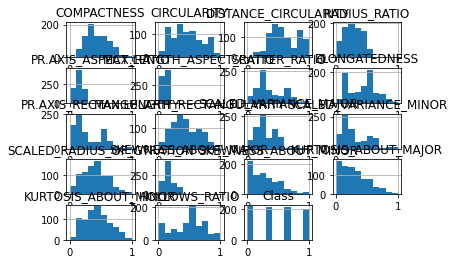

In [593]:
min_max_scaler_df.hist()

In [594]:
min_max_scaler_df['Class']=number.inverse_transform(df['Class'])
min_max_scaler_df.head(20)

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,0.478261,0.576923,0.597222,0.323144,0.274725,0.150943,0.326797,0.457143,0.250000,0.585714,0.242105,0.233813,0.471698,0.144737,0.272727,0.390244,0.366667,0.533333,van
1,0.391304,0.307692,0.611111,0.161572,0.109890,0.132075,0.241830,0.542857,0.166667,0.357143,0.210526,0.175060,0.308176,0.171053,0.409091,0.341463,0.433333,0.600000,van
2,0.673913,0.653846,0.916667,0.458515,0.208791,0.150943,0.620915,0.171429,0.500000,0.571429,0.489474,0.540767,0.698113,0.184211,0.636364,0.219512,0.400000,0.500000,saab
3,0.434783,0.307692,0.583333,0.240175,0.175824,0.132075,0.209150,0.571429,0.166667,0.357143,0.157895,0.149880,0.113208,0.052632,0.272727,0.243902,0.766667,0.866667,van
4,0.260870,0.423077,0.416667,0.441048,0.615385,0.943396,0.241830,0.542857,0.166667,0.371429,0.584211,0.169065,0.496855,0.894737,0.409091,0.268293,0.133333,0.066667,bus
5,0.739130,0.923077,0.916667,0.296943,0.032967,0.075472,0.934641,0.000000,0.916667,0.728571,0.789474,0.926859,0.974843,0.342105,0.227273,0.219512,0.166667,0.066667,bus
6,0.521739,0.384615,0.458333,0.301310,0.197802,0.075472,0.267974,0.457143,0.166667,0.357143,0.242105,0.212230,0.396226,0.092105,0.590909,0.024390,0.800000,0.766667,bus
7,0.369565,0.384615,0.361111,0.231441,0.197802,0.132075,0.163399,0.628571,0.083333,0.400000,0.168421,0.116307,0.345912,0.105263,0.136364,0.073171,0.566667,0.700000,van
8,0.282609,0.038462,0.305556,0.157205,0.153846,0.094340,0.065359,0.800000,0.000000,0.128571,0.057895,0.046763,0.018868,0.065789,0.090909,0.341463,0.800000,0.900000,van
9,0.434783,0.423077,0.805556,0.406114,0.164835,0.169811,0.464052,0.285714,0.416667,0.400000,0.378947,0.384892,0.270440,0.065789,0.181818,0.341463,0.633333,0.766667,saab


### 1.c

<AxesSubplot:>

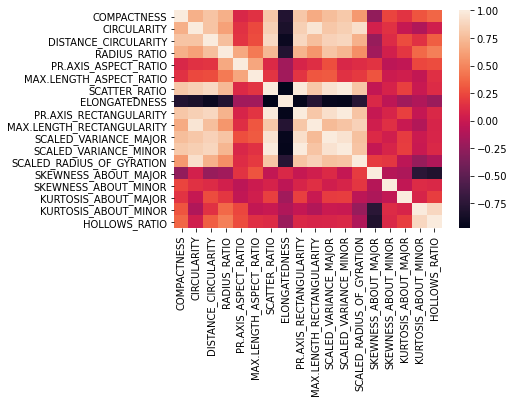

In [595]:
sns.heatmap(min_max_scaler_df.corr())

### 1.d

In [596]:
x = min_max_scaler_df.iloc[:,:-1]
y = min_max_scaler_df.iloc[:,-1]

### 1.e

<AxesSubplot:>

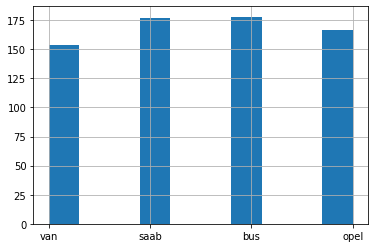

In [597]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
y_train.hist()

<AxesSubplot:>

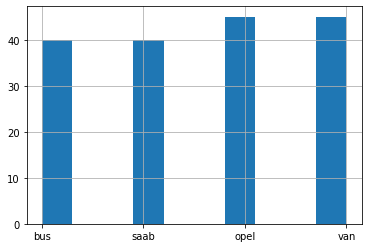

In [598]:
y_test.hist()

### 1.f

[Text(248.0, 475.65000000000003, 'X[7] <= 0.443\nentropy = 1.998\nsamples = 676\nvalue = [178, 167, 177, 154]'),
 Text(124.0, 339.75, 'X[5] <= 0.104\nentropy = 1.553\nsamples = 311\nvalue = [74, 114, 123, 0]'),
 Text(62.0, 203.85000000000002, 'entropy = 0.914\nsamples = 91\nvalue = [73, 8, 10, 0]'),
 Text(186.0, 203.85000000000002, 'entropy = 1.037\nsamples = 220\nvalue = [1, 106, 113, 0]'),
 Text(372.0, 339.75, 'X[9] <= 0.293\nentropy = 1.853\nsamples = 365\nvalue = [104, 53, 54, 154]'),
 Text(310.0, 203.85000000000002, 'entropy = 1.902\nsamples = 142\nvalue = [15, 41, 46, 40]'),
 Text(434.0, 203.85000000000002, 'X[0] <= 0.337\nentropy = 1.423\nsamples = 223\nvalue = [89, 12, 8, 114]'),
 Text(372.0, 67.94999999999999, 'entropy = 1.053\nsamples = 105\nvalue = [80, 5, 2, 18]'),
 Text(496.0, 67.94999999999999, 'entropy = 0.986\nsamples = 118\nvalue = [9, 7, 6, 96]')]

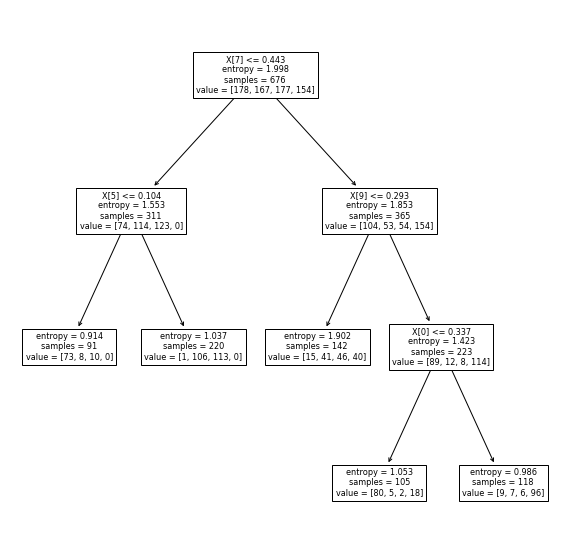

In [599]:
c50_01 = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=5).fit(x_train,y_train)
fig, axs = plt.subplots(1, 1, figsize=(10,10))
tree.plot_tree(c50_01, ax=axs)

### 1.g

In [600]:
y_pred = c50_01.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.5176470588235295

### 1.i

In [601]:
goal=tree.export_graphviz(c50_01, out_file=None,feature_names=x.columns,  
                                    filled=True, rounded=True,  
                                    special_characters=True )
import pydotplus
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
graph = pydotplus.graph_from_dot_data(goal)
graph.write_png("./Q1_tree.png")

True